Author: Maha Alali

# Housing Renovations Analysis in Boston

## Introduction
This notebook presents an analysis of housing renovations in Boston. The objective is to identify areas with the highest number of renovations and visualize them using a heat map. This is based on the client question: Where are housing remodels and renovations happening?

Approach

## Setup
In this section, we import the necessary Python libraries and set up our environment for analysis.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

## Data Loading
In this section, we load property data to identify buildings undergoing renovations. Additional features are retained to enhance our analysis and visualization of renovation trends across different locations.

In [2]:
pa_2008 = pd.read_csv('../data/property_assessment_2008.csv')[['PID','LU', 'FY2008_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']] 
# R_BDRMS = bedrooms, S_UNIT_RES' = residential units

pa_2009 = pd.read_csv('../data/property_assessment_2009.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]
# AV_TOTAL is now the total value of property

pa_2010 = pd.read_csv('../data/property_assessment_2010.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]
pa_2011 = pd.read_csv('../data/property_assessment_2011.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]
pa_2012 = pd.read_csv('../data/property_assessment_2012.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]
pa_2013 = pd.read_csv('../data/property_assessment_2013.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]

pa_2014 = pd.read_csv('../data/property_assessment_2014.csv')[['Parcel_ID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]
pa_2014.rename(columns={'Parcel_ID': 'PID'}, inplace=True)

pa_2015 = pd.read_csv('../data/property_assessment_2015.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]
pa_2016 = pd.read_csv('../data/property_assessment_2016.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]
pa_2017 = pd.read_csv('../data/property_assessment_2017.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']] 
pa_2018 = pd.read_csv('../data/property_assessment_2018.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]
pa_2020 = pd.read_csv('../data/property_assessment_2020.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]

pa_2021 = pd.read_csv('../data/property_assessment_2021.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS', 'YR_REMODEL', 'RES_UNITS', 'ZIPCODE']]
# AV_Total is now TOTAL_VALUE, R_BDRMS is now BED_RMS

pa_2022 = pd.read_csv('../data/property_assessment_2022.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS', 'YR_REMODEL', 'RES_UNITS', 'ZIPCODE']]
pa_2023 = pd.read_csv('../data/property_assessment_2023.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS', 'YR_REMODEL', 'RES_UNITS', 'ZIP_CODE']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv')[['PID','LU', 'TOTAL_VALUE', 'GROSS_AREA', 'LIVING_AREA', 'BED_RMS', 'YR_REMODEL', 'RES_UNITS', 'ZIP_CODE']]

/var/folders/d0/35z98j6s1_s8v_lhkt9b2wcw0000gn/T/ipykernel_99341/3745938595.py:1: DtypeWarning: Columns (7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2008 = pd.read_csv('../data/property_assessment_2008.csv')[['PID','LU', 'FY2008_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]
/var/folders/d0/35z98j6s1_s8v_lhkt9b2wcw0000gn/T/ipykernel_99341/3745938595.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2009 = pd.read_csv('../data/property_assessment_2009.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_AREA', 'R_BDRMS', 'YR_REMOD', 'S_UNIT_RES', 'ZIPCODE']]
/var/folders/d0/35z98j6s1_s8v_lhkt9b2wcw0000gn/T/ipykernel_99341/3745938595.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pa_2010 = pd.read_csv('../data/property_assessment_2010.csv')[['PID','LU', 'AV_TOTAL', 'GROSS_AREA', 'LIVING_

## Data cleaning 

Store the DataFrames in a dictionary for easier access

In [3]:
# Store the DataFrames in a dictionary for easier access
pa_df = {
    2008: pa_2008,
    2009: pa_2009,
    2010: pa_2010,
    2011: pa_2011,
    2012: pa_2012,
    2013: pa_2013,
    2014: pa_2014,
    2015: pa_2015,
    2016: pa_2016,
    2017: pa_2017,
    2018: pa_2018,
    2019: pa_2019,
    2020: pa_2020,
    2021: pa_2021,
    2022: pa_2022,
    2023: pa_2023,
    2024: pa_2024,
}

Change all remodelled years with col names 'YR_REMODEL' or 'YR_REMOD' to 'YR_REMODELLED'

In [4]:
# Loop through each year's DataFrame and filter it
# Change all remodelled years with col names 'YR_REMODEL' or 'YR_REMOD' to 'YR_REMODELLED'
for year, df in pa_df.items():
    if 'YR_REMOD' in df.columns and 'YR_REMODEL' in df.columns:
        # Use numpy's where function to create 'YR_REMODELLED' based on the condition
        # that if 'YR_REMODEL' is not NaN (notna()), use 'YR_REMODEL', otherwise use 'YR_REMOD'
        df['YR_REMODELLED'] = np.where(df['YR_REMODEL'].notna(), df['YR_REMODEL'], df['YR_REMOD'])

    elif 'YR_REMOD' in df.columns:
        # If only 'YR_REMOD' is available, copy its values to 'YR_REMODELLED'
        df['YR_REMODELLED'] = df['YR_REMOD']

    elif 'YR_REMODEL' in df.columns:
        # If only 'YR_REMODEL' is available, copy its values to 'YR_REMODELLED'
        df['YR_REMODELLED'] = df['YR_REMODEL']
        
    print(year)
    display(df['YR_REMODELLED'])


2008


0            NaN
1         2000.0
2         1985.0
3         1991.0
4         1978.0
           ...  
155559       NaN
155560    1990.0
155561    1998.0
155562       NaN
155563    2003.0
Name: YR_REMODELLED, Length: 155564, dtype: float64

2009


0            NaN
1         2000.0
2         1985.0
3         1991.0
4         1978.0
           ...  
158087       NaN
158088       NaN
158089    1990.0
158090    1998.0
158091       NaN
Name: YR_REMODELLED, Length: 158092, dtype: float64

2010


0         2001.0
1            0.0
2            0.0
3         2002.0
4         2004.0
           ...  
160078       NaN
160079       NaN
160080    1990.0
160081    1998.0
160082       NaN
Name: YR_REMODELLED, Length: 160083, dtype: float64

2011


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
161256    1997.0
161257    2000.0
161258    2000.0
161259    2006.0
161260       NaN
Name: YR_REMODELLED, Length: 161261, dtype: float64

2012


0         1997.0
1         1997.0
2         1997.0
3         1997.0
4         1997.0
           ...  
164842    1990.0
164843    2010.0
164844       NaN
164845       NaN
164846       NaN
Name: YR_REMODELLED, Length: 164847, dtype: float64

2013


0            NaN
1         2000.0
2         1985.0
3         1991.0
4         1978.0
           ...  
165603    1990.0
165604    2010.0
165605       NaN
165606       NaN
165607       NaN
Name: YR_REMODELLED, Length: 165608, dtype: float64

2014


Series([], Name: YR_REMODELLED, dtype: object)

2015


0            0.0
1         2012.0
2            0.0
3            0.0
4            0.0
           ...  
168110    2012.0
168111    2009.0
168112    2012.0
168113    2009.0
168114    2012.0
Name: YR_REMODELLED, Length: 168115, dtype: float64

2016


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
169194       NaN
169195    2006.0
169196       NaN
169197    2006.0
169198    2010.0
Name: YR_REMODELLED, Length: 169199, dtype: float64

2017


0            NaN
1         2000.0
2         1985.0
3         1991.0
4         1978.0
           ...  
170905    1990.0
170906    2010.0
170907       NaN
170908       NaN
170909       NaN
Name: YR_REMODELLED, Length: 170910, dtype: float64

2018


0            NaN
1         2000.0
2         1985.0
3         1991.0
4         1978.0
           ...  
172836    1990.0
172837    2016.0
172838       NaN
172839       NaN
172840       NaN
Name: YR_REMODELLED, Length: 172841, dtype: float64

2019


0         2006.0
1         1981.0
2         2016.0
3         1981.0
4         2014.0
           ...  
174663    1990.0
174664    2016.0
174665       NaN
174666       NaN
174667       NaN
Name: YR_REMODELLED, Length: 174668, dtype: float64

2020


0         2018.0
1         2018.0
2         2018.0
3            NaN
4            NaN
           ...  
175047    1999.0
175048    2001.0
175049    2001.0
175050    1999.0
175051    1999.0
Name: YR_REMODELLED, Length: 175052, dtype: float64

2021


0            NaN
1         2000.0
2         1985.0
3         1991.0
4         1978.0
           ...  
177086       NaN
177087       NaN
177088    1990.0
177089    2016.0
177090       NaN
Name: YR_REMODELLED, Length: 177091, dtype: float64

2022


0            NaN
1         2000.0
2         1985.0
3         1991.0
4         1978.0
           ...  
178593       NaN
178594       NaN
178595    1990.0
178596    2016.0
178597       NaN
Name: YR_REMODELLED, Length: 178598, dtype: float64

2023


0            NaN
1         2000.0
2         1985.0
3         1991.0
4         1978.0
           ...  
180622       NaN
180623       NaN
180624    1990.0
180625    2016.0
180626       NaN
Name: YR_REMODELLED, Length: 180627, dtype: float64

2024


0            NaN
1         2000.0
2         1985.0
3         1991.0
4         1978.0
           ...  
182237       NaN
182238       NaN
182239    1990.0
182240    2016.0
182241       NaN
Name: YR_REMODELLED, Length: 182242, dtype: float64

Lets replace for null values in the column feature 'YR_REMODELLED' with 0.

In [5]:
for year, df in pa_df.items():
    if 'YR_REMODELLED' in df.columns: 
        df['YR_REMODELLED'].replace(np.NaN, 0, inplace=True) 

    if 'YR_REMOD' in df.columns:
        df.drop(columns=['YR_REMOD'], inplace=True)  # Add inplace=True here
    if 'YR_REMODEL' in df.columns:
        df.drop(columns=['YR_REMODEL'], inplace=True)  # And here

Now we need change columns 'S_UNIT_RES' (2008-2020) to 'RES_UNITS'

In [6]:
for year, df in pa_df.items():
    if 'S_UNIT_RES' in df.columns:
        df.rename(columns={'S_UNIT_RES': 'RES_UNITS'}, inplace=True)
    df['RES_UNITS'] = df['RES_UNITS'].fillna(0)     
    # print(year)
    # display(df['RES_UNITS'])
    # display(df.columns)

Get long and lat from Sam dataset and merge based on PID

In [7]:
sam_data = pd.read_csv('../data/Live_Street_Address_Management_(SAM)_Addresses.csv')[['PARCEL','X', 'Y']]

# Function to merge data with SAM data to get lat and long
def merge_with_sam(data, sam_data):
    # Merge on 'PID' from data and 'PARCEL' from sam_data
    merged_data = pd.merge(data, sam_data, left_on='PID', right_on='PARCEL')

    # Dropping the 'PARCEL' column as 'PARCEL' and 'PID' are the same
    merged_data.drop(columns=['PARCEL'], inplace=True)

    # Rename 'X' to 'latitude' and 'Y' to 'longitude'
    merged_data.rename(columns={'X': 'latitude', 'Y': 'longitude'}, inplace=True)

    return merged_data


#Create a dataset for all years for simplicity
for year, df in pa_df.items():
    df['DATA_YEAR'] = year
    
dataframes = [df for year, df in pa_df.items()]

# Now concatenate those DataFrames
all_data = pd.concat(dataframes, ignore_index=True)

# Merge data
all_data_merged = merge_with_sam(all_data, sam_data)

display(all_data_merged.head())


/var/folders/d0/35z98j6s1_s8v_lhkt9b2wcw0000gn/T/ipykernel_99341/2498089124.py:1: DtypeWarning: Columns (8,9,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  sam_data = pd.read_csv('../data/neighborhood_data/Live_Street_Address_Management_(SAM)_Addresses.csv')[['PARCEL','X', 'Y']]
/var/folders/d0/35z98j6s1_s8v_lhkt9b2wcw0000gn/T/ipykernel_99341/2498089124.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat(dataframes, ignore_index=True)


,PID,LU,FY2008_TOTAL,GROSS_AREA,LIVING_AREA,R_BDRMS,RES_UNITS,ZIPCODE,YR_REMODELLED,DATA_YEAR,AV_TOTAL,TOTAL_VALUE,BED_RMS,ZIP_CODE,latitude,longitude
0,100001000,R3,365200.0,3353.0,2202.0,6.0,0.0,2128.0,0.0,2008,NaN,NaN,NaN,NaN,-71.032609,42.379420
1,100001000,R3,365200.0,3353.0,2202.0,6.0,0.0,2128.0,0.0,2008,NaN,NaN,NaN,NaN,-71.032601,42.379409
2,100001000,R3,365200.0,3353.0,2202.0,6.0,0.0,2128.0,0.0,2008,NaN,NaN,NaN,NaN,-71.032601,42.379409
3,100001000,R3,365200.0,3353.0,2202.0,6.0,0.0,2128.0,0.0,2008,NaN,NaN,NaN,NaN,-71.032601,42.379409
4,100001000,R3,NaN,3353.0,2202.0,6.0,0.0,2128.0,0.0,2009,270500.0,NaN,NaN,NaN,-71.032609,42.379420


Drop rows where R_UNITS is 0 

In [8]:
all_data_merged['RES_UNITS'] = all_data_merged['RES_UNITS'].fillna(0)

# Determine the number of rows before dropping
rows_before = all_data_merged.shape[0]
print(f"Number of rows before dropping: {rows_before}")

# Drop rows where 'RES_UNITS' is zero
all_data_merged = all_data_merged[all_data_merged['RES_UNITS'] != 0]

# Determine the number of rows after dropping
rows_after = all_data_merged.shape[0]
print(f"Number of rows after dropping: {rows_after}")

# Optionally, display the first few rows of the DataFrame after dropping the rows
display(all_data_merged.head())

Number of rows before dropping: 2916571
Number of rows after dropping: 387876


,PID,LU,FY2008_TOTAL,GROSS_AREA,LIVING_AREA,R_BDRMS,RES_UNITS,ZIPCODE,YR_REMODELLED,DATA_YEAR,AV_TOTAL,TOTAL_VALUE,BED_RMS,ZIP_CODE,latitude,longitude
885,100018000,CM,NaN,NaN,NaN,NaN,4.0,2128,2018.0,2022,NaN,0,8.0,NaN,-71.031161,42.379909
886,100018000,CM,NaN,NaN,NaN,NaN,4.0,2128,2018.0,2022,NaN,0,8.0,NaN,-71.031161,42.379909
887,100018000,CM,NaN,NaN,NaN,NaN,4.0,2128,2018.0,2022,NaN,0,8.0,NaN,-71.031161,42.379909
888,100018000,CM,NaN,NaN,NaN,NaN,4.0,2128,2018.0,2022,NaN,0,8.0,NaN,-71.031161,42.379909
889,100018000,CM,NaN,NaN,NaN,NaN,4.0,NaN,0.0,2023,NaN,0,NaN,2128.0,-71.031161,42.379909


Calculate Changes in Residential Units

In [9]:
rows_to_append = []  # Initialize an empty list to collect DataFrames

# Loop over each PID and process the groups
for pid, group in all_data_merged.groupby('PID'):
    # Ensure the group is sorted by year
    group = group.sort_values(by='DATA_YEAR')
    
    # Get all the remodel years for the PID that fall between 2008 and 2023
    remodel_years = group.loc[group['YR_REMODELLED'].between(2008, 2023), 'YR_REMODELLED'].unique()

    for remodel_year in remodel_years:
        remodel_year_int = int(remodel_year)  # Convert to integer

        # Find the data entry before the renovation
        pre_remodel_data = group[group['DATA_YEAR'] < remodel_year].iloc[-1:]

        # Find the data entry after the renovation
        after_remodel_data = pd.DataFrame()
        for year in range(remodel_year_int, 2024):
            after_data = group[group['DATA_YEAR'] == year]
            if not after_data.empty and (after_data['YR_REMODELLED'] == remodel_year).any():
                after_remodel_data = after_data[after_data['YR_REMODELLED'] == remodel_year].copy()
                after_remodel_data.loc[:, 'REMODEL_YEAR'] = remodel_year
                break

        # Calculate the change in residential units if both before and after data exist
        if not pre_remodel_data.empty and not after_remodel_data.empty:
            pre_remodel_data = pre_remodel_data.copy()
            pre_remodel_data.loc[:, 'REMODEL_YEAR'] = remodel_year

            # Calculate the change in RES_UNITS
            units_change = after_remodel_data['RES_UNITS'].values[0] - pre_remodel_data['RES_UNITS'].values[0]
            after_remodel_data.loc[:, 'RES_UNITS_change'] = units_change

            # Keep the necessary columns and append the data for visualization
            relevant_data = after_remodel_data[['PID', 'REMODEL_YEAR', 'RES_UNITS_change', 'latitude', 'longitude']].copy()
            rows_to_append.append(relevant_data)

# Concatenate all rows into a DataFrame
res_units_renovation_comparison = pd.concat(rows_to_append, ignore_index=True)

# Next steps would involve spatially joining this data with neighborhood boundaries
# and visualizing the changes in residential units in the same manner as done before
display(res_units_renovation_comparison.head())

,PID,REMODEL_YEAR,RES_UNITS_change,latitude,longitude
0,101399100,2016.0,0.0,-70.995581,42.389219
1,101399100,2016.0,0.0,-70.995581,42.389219
2,101399100,2016.0,0.0,-70.995581,42.389219
3,101399100,2016.0,0.0,-70.995581,42.389219
4,101399100,2016.0,0.0,-70.995811,42.389369


Load the GeoJSON file to understand the structure of the neighborhood boundaries data.

In [10]:
import geopandas as gpd

# Load the GeoJSON file
neighborhood_boundaries = gpd.read_file('../data/neighborhood_data/BPDA_Neighborhood_Boundaries.geojson')

# Display the first few rows to verify the structure
display(neighborhood_boundaries)

,sqmiles,name,neighborhood_id,acres,SHAPE__Length,objectid,SHAPE__Area,geometry
0,2.51,Roslindale,15,1605.568237,53563.912597,53,6.993827e+07,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ..."
1,3.94,Jamaica Plain,11,2519.245394,56349.937161,54,1.097379e+08,"POLYGON ((-71.10499 42.32610, -71.10503 42.326..."
2,0.55,Mission Hill,13,350.853564,17918.724113,55,1.528312e+07,"POLYGON ((-71.09043 42.33577, -71.09050 42.335..."
3,0.29,Longwood,28,188.611947,11908.757148,56,8.215904e+06,"POLYGON ((-71.09811 42.33673, -71.09832 42.337..."
4,0.04,Bay Village,33,26.539839,4650.635493,57,1.156071e+06,"POLYGON ((-71.06663 42.34878, -71.06663 42.348..."
5,0.02,Leather District,27,15.639908,3237.140537,58,6.812717e+05,"POLYGON ((-71.05838 42.34983, -71.05834 42.349..."
6,0.12,Chinatown,26,76.324410,9736.590413,59,3.324678e+06,"POLYGON ((-71.05791 42.35238, -71.05811 42.352..."
7,0.20,North End,14,126.910439,16177.826815,60,5.527506e+06,"POLYGON ((-71.05200 42.36884, -71.05219 42.368..."
8,3.29,Roxbury,16,2108.469072,49488.800485,61,9.184455e+07,"POLYGON ((-71.09646 42.29323, -71.09633 42.293..."
9,0.74,South End,32,471.535356,17912.333569,62,2.054000e+07,"POLYGON ((-71.06834 42.34775, -71.06913 42.347..."


Associate Changes with Neighborhoods (Convert property data into a GeoDataFrame)

In [11]:
from shapely.geometry import Point

# Assuming 'latitude' and 'longitude' columns exist in your dataset
property_geo = gpd.GeoDataFrame(res_units_renovation_comparison, geometry=gpd.points_from_xy(res_units_renovation_comparison.latitude, res_units_renovation_comparison.longitude))
display(property_geo.head())

,PID,REMODEL_YEAR,RES_UNITS_change,latitude,longitude,geometry
0,101399100,2016.0,0.0,-70.995581,42.389219,POINT (-70.99558 42.38922)
1,101399100,2016.0,0.0,-70.995581,42.389219,POINT (-70.99558 42.38922)
2,101399100,2016.0,0.0,-70.995581,42.389219,POINT (-70.99558 42.38922)
3,101399100,2016.0,0.0,-70.995581,42.389219,POINT (-70.99558 42.38922)
4,101399100,2016.0,0.0,-70.995811,42.389369,POINT (-70.99581 42.38937)


Perform a spatial join with the neighborhood boundaries

In [12]:
# Ensure both GeoDataFrames use the same CRS
property_geo = property_geo.set_crs(neighborhood_boundaries.crs)

# Spatial join
properties_with_neighborhoods = gpd.sjoin(property_geo, neighborhood_boundaries, how='inner', op='intersects')
display(properties_with_neighborhoods.head())

/Users/maha/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,PID,REMODEL_YEAR,RES_UNITS_change,latitude,longitude,geometry,index_right,sqmiles,name,neighborhood_id,acres,SHAPE__Length,objectid,SHAPE__Area
0,101399100,2016.0,0.0,-70.995581,42.389219,POINT (-70.99558 42.38922),11,4.71,East Boston,8,3012.059593,121089.100852,64,1.313845e+08
1,101399100,2016.0,0.0,-70.995581,42.389219,POINT (-70.99558 42.38922),11,4.71,East Boston,8,3012.059593,121089.100852,64,1.313845e+08
2,101399100,2016.0,0.0,-70.995581,42.389219,POINT (-70.99558 42.38922),11,4.71,East Boston,8,3012.059593,121089.100852,64,1.313845e+08
3,101399100,2016.0,0.0,-70.995581,42.389219,POINT (-70.99558 42.38922),11,4.71,East Boston,8,3012.059593,121089.100852,64,1.313845e+08
4,101399100,2016.0,0.0,-70.995811,42.389369,POINT (-70.99581 42.38937),11,4.71,East Boston,8,3012.059593,121089.100852,64,1.313845e+08


Summarize the changes in residential units by neighborhood

In [13]:
res_units_by_neighborhood = properties_with_neighborhoods.groupby('name')['RES_UNITS_change'].sum().reset_index()

display(res_units_by_neighborhood.head())

,name,RES_UNITS_change
0,Allston,0.0
1,Back Bay,-585.0
2,Bay Village,0.0
3,Beacon Hill,-595.0
4,Brighton,-47152.0


Visualize the Data

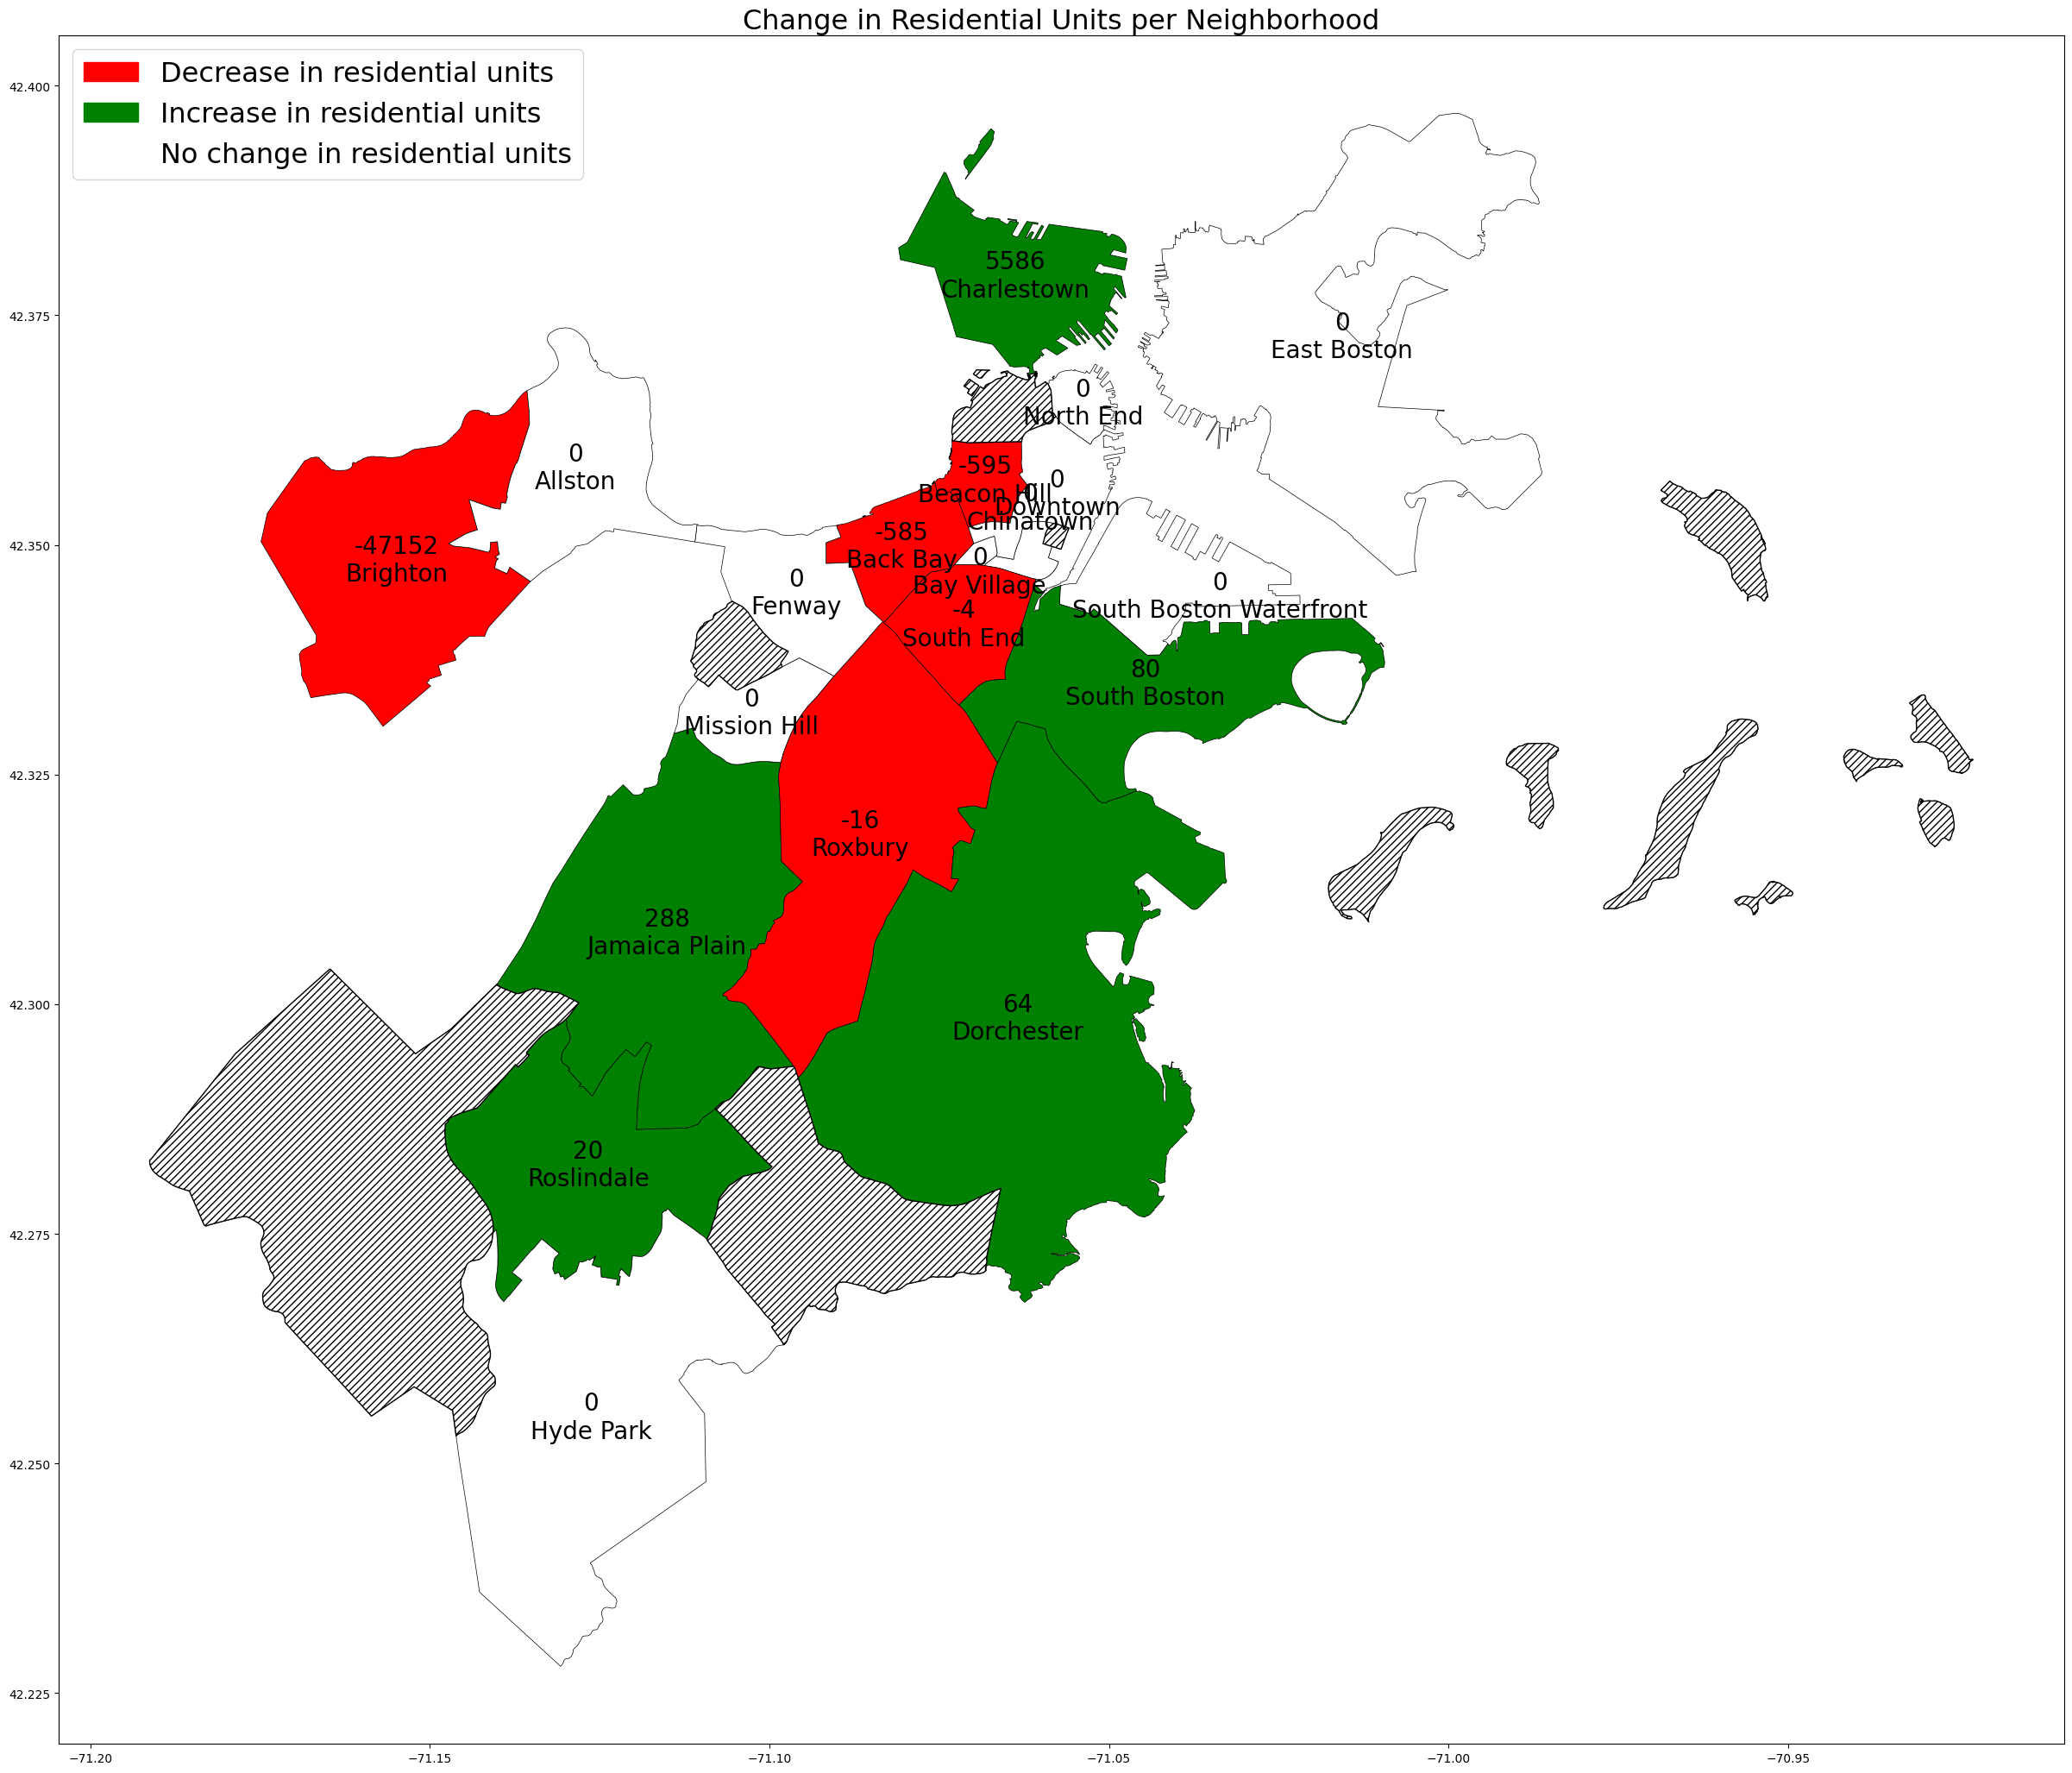

In [14]:
if 'RES_UNITS_change' in neighborhood_boundaries.columns:
    neighborhood_boundaries.drop(columns=['RES_UNITS_change'])
neighborhood_boundaries = neighborhood_boundaries.merge(res_units_by_neighborhood, on='name', how='left')


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define colors based on increase/decrease in residential units
neighborhood_boundaries['color'] = 'white'  # Default color for no change
neighborhood_boundaries.loc[neighborhood_boundaries['RES_UNITS_change'] > 0, 'color'] = 'green'  # Increase
neighborhood_boundaries.loc[neighborhood_boundaries['RES_UNITS_change'] < 0, 'color'] = 'red'    # Decrease

fig, ax = plt.subplots(1, figsize=(30, 30))

# Plot using custom colors
neighborhood_boundaries.plot(ax=ax, color=neighborhood_boundaries['color'], edgecolor='black', linewidth=0.5)

# Add lines for areas with missing data
missing_data_areas = neighborhood_boundaries[pd.isnull(neighborhood_boundaries['RES_UNITS_change'])]
missing_data_areas.plot(ax=ax, color="white", hatch="////", edgecolor="black", linewidth=1)

# Custom legend
red_patch = mpatches.Patch(color='red', label='Decrease in residential units')
green_patch = mpatches.Patch(color='green', label='Increase in residential units')
white_patch = mpatches.Patch(color='white', label='No change in residential units')
plt.legend(handles=[red_patch, green_patch, white_patch], loc='upper left', fontsize=23)

# Annotations for RES_UNITS change and neighborhood name
for idx, row in neighborhood_boundaries.iterrows():
    if pd.notnull(row['RES_UNITS_change']):
        if row['name'] == 'Chinatown':
            # Adjust position for Chinatown label
            ax.annotate(f"{int(row['RES_UNITS_change'])}\n{row['name']}", 
                        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y + 0.005),  # Adjust Y position
                        horizontalalignment='center', verticalalignment='center',
                        fontsize=20, color='black')
        elif row['name'] == 'Bay Village':
            # Adjust position for Chinatown label
            ax.annotate(f"{int(row['RES_UNITS_change'])}\n{row['name']}", 
                        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y - 0.002),  # Adjust Y position
                        horizontalalignment='center', verticalalignment='center',
                        fontsize=20, color='black')
        elif row['name'] == 'South Boston Waterfront':
            # Adjust position for Chinatown label
            ax.annotate(f"{int(row['RES_UNITS_change'])}\n{row['name']}", 
                        xy=(row['geometry'].centroid.x + 0.008, row['geometry'].centroid.y - 0.002),  # Adjust Y position
                        horizontalalignment='center', verticalalignment='center',
                        fontsize=20, color='black')
        else:
            ax.annotate(f"{int(row['RES_UNITS_change'])}\n{row['name']}", 
                        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                        horizontalalignment='center', verticalalignment='center',
                        fontsize=20, color='black')

plt.title('Change in Residential Units per Neighborhood', fontsize=23)
plt.show()
